# Regression Problem with Greedy Layer-Wise Trained Neural Network

## 1. Libraries and settings

**1.1 Importing libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
os.chdir('C:/Users/Nicolas/Documents/Data/electric-motor-'\
         'temperature')

**1.2 Plot theme**

In [55]:
theme_color = '#8FCB9B'

def set_theme():
    return ax.set_facecolor(theme_color),\
    ax.grid(True, alpha=4e-1, color='white'),\
    ax.set_axisbelow(True)

## 2. Importing the data

**2.1 Importing**

In [4]:
df = pd.read_csv('pmsm_temperature_data.csv').astype(np.float32)

**2.2 Exploring**

2.2.1 Head

In [5]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332772,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017344,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0


2.2.2 Profile ID

In [5]:
df['profile_id'].value_counts().head()

20.0    43970
6.0     40387
65.0    40093
66.0    36475
27.0    35360
Name: profile_id, dtype: int64

In [6]:
df = df.loc[df['profile_id'] == 6].drop('profile_id', axis=1)

In [7]:
print(f'We now have {df.shape[0]:,} rows and {df.shape[1]} columns.')

We now have 40,387 rows and 12 columns.


## 3. Visualizing distributions of the target variables

**3.1 Stator tooth**

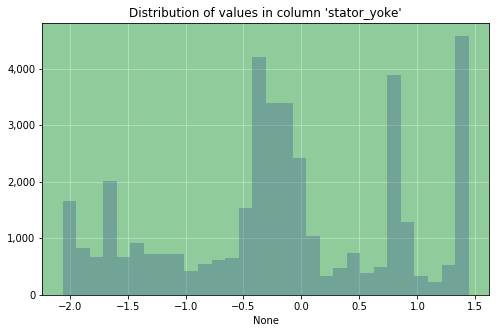

In [56]:
fig, ax = plt.subplots(figsize=(8, 5))
set_theme()
sns.distplot(df.iloc[:, -2], color='#456990', 
             bins=30, kde=False)
ax.set_yticklabels(['{:,}'.format(x) for x in np.array(ax.get_yticks(), 
                                                       dtype=int)])
plt.title("Distribution of values in column '{}'".format(df.columns[-3]))
plt.xlabel(None)
plt.show()

## 4. Processing data for predictive modeling

**4.1 Separating the predictor and target variables**

In [13]:
X = df.drop(['stator_yoke', 'stator_tooth', 'stator_winding'], axis=1).values

In [14]:
y = df['stator_tooth'].values

#### 4.2 Rescaling the data

In [15]:
scaler = MinMaxScaler()

In [16]:
X = scaler.fit_transform(X)

**4.2 Train/test split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2e-1)             

## 5. Greedy Layer-Wise Neural Net vs Dense Neural Net

### 5.1 Greedy Layer-Wise Neural Net

We're going to start off with a single-layer neural net. Then we will add identical layers, trained 'greedily', up to 10.

5.1.1 Building the model

In [19]:
model = Sequential([
    Dense(48, input_shape=(X.shape[1],), trainable=True, name='first'),
    Dense(1, activation='linear')
])

5.1.2 Compiling the model

In [20]:
model.compile(optimizer='adam', loss='mae')

5.1.3 Training the model

In [22]:
first = model.fit(X_train, y_train,
                  epochs=10,
                  validation_data=[X_test, y_test],
                  batch_size=8)

Train on 32309 samples, validate on 8078 samples
Epoch 1/10
32309/32309 [==============================] - 17s 542us/step - loss: 0.1818 - val_loss: 0.1655
Epoch 2/10
32309/32309 [==============================] - 13s 400us/step - loss: 0.1596 - val_loss: 0.1559
Epoch 3/10
32309/32309 [==============================] - 13s 394us/step - loss: 0.1587 - val_loss: 0.1566
Epoch 4/10
32309/32309 [==============================] - 12s 383us/step - loss: 0.1574 - val_loss: 0.1571
Epoch 5/10
32309/32309 [==============================] - 13s 407us/step - loss: 0.1575 - val_loss: 0.1552
Epoch 6/10
32309/32309 [==============================] - 12s 374us/step - loss: 0.1569 - val_loss: 0.1626
Epoch 7/10
32309/32309 [==============================] - 12s 367us/step - loss: 0.1565 - val_loss: 0.1550
Epoch 8/10
32309/32309 [==============================] - 12s 384us/step - loss: 0.1565 - val_loss: 0.1561
Epoch 9/10
32309/32309 [==============================] - 12s 379us/step - loss: 0.1559 - val_l

5.1.4 Making predictions

In [23]:
y_pred = model.predict(X_test)

5.1.5 Evaluating predictions

In [24]:
mae_first = mean_absolute_error(y_test, y_pred)
mae_first

0.15531653

5.1.6 Making a metrics dataframe

In [25]:
metrics = pd.DataFrame([first.history['loss'][-1], mae_first], 
                       columns=['One Layer'], index=['MAE Train', 'MAE Test']).T
metrics

,MAE Train,MAE Test
One Layer,0.155934,0.155317


5.1.7 Plotting the metrics

### 5.2 Adding More Layers

5.2.1 Function to evaluate the model

In [26]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    return train_loss, test_loss

5.2.2 Function to add layers and evaluate the model's performance

In [27]:
def add_layer():
    output_layer = model.layers[-1]
    model.pop()
    for layer in model.layers:
        layer.trainable = False
    model.add(Dense(48, activation='relu', kernel_initializer='he_uniform'))
    model.add(output_layer)
    
    model.fit(X_train, y_train,
              epochs=10,
              batch_size=8,
              verbose=0)
    
    train_mae, test_mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    return train_mae, test_mae

5.2.3 Training the models, up to 10 layers

In [28]:
train_loss_history, test_loss_history = [], []
for i in range(10):
    train_loss, test_loss = add_layer()
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    print('Train loss: {} — Test loss: {}'.format(train_loss, test_loss))

Train loss: 0.040023933932715104 — Test loss: 0.04025506637861349
Train loss: 0.0441103787772366 — Test loss: 0.044619352850296556
Train loss: 0.0318532315782702 — Test loss: 0.03226936412650071
Train loss: 0.031455077156906486 — Test loss: 0.03190078808344748
Train loss: 0.02738665429300878 — Test loss: 0.027713152854817506
Train loss: 0.019409112999050092 — Test loss: 0.0197878060336694
Train loss: 0.018066894518941747 — Test loss: 0.018076957351020596
Train loss: 0.01656917078584998 — Test loss: 0.016372689290844247
Train loss: 0.016209089571747937 — Test loss: 0.015990308411677645
Train loss: 0.021157031696421337 — Test loss: 0.02094251515127499


5.2.4 Plotting the metrics history

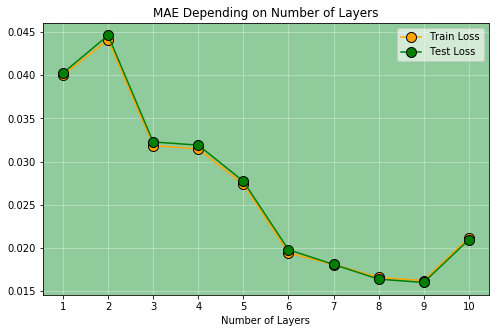

In [57]:
fig, ax = plt.subplots(figsize=(8, 5))
set_theme()

ax.plot(np.arange(1, 11), train_loss_history, color='orange', marker='o', 
       markeredgecolor='k', alpha=1, markersize=10)

ax.plot(np.arange(1, 11), test_loss_history, color='green', marker='o', 
       markeredgecolor='k', alpha=1, markersize=10)

plt.legend(['Train Loss', 'Test Loss'], framealpha=.6)
plt.title('MAE Depending on Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('MAE')
plt.xticks(np.arange(1, 11))
plt.show()

We can see that the best model is the one with 9 layers. So we will compare it with a fully-connected neural network trained normally. 

### 5.3 Comparing with a Fully-Connected Neural Net (9 layers)

5.3.1 Building the models

In [31]:
model = Sequential([
    Dense(48, input_shape=(X.shape[1],)),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(48, activation='relu', kernel_initializer='he_uniform'),
    Dense(1, activation='linear')
])

5.3.2 Compiling the model

In [32]:
model.compile(optimizer='adam', loss='mae')

5.3.3 Fitting the model

In [33]:
_ = model.fit(X_train, y_train,
              epochs=9*10,
              batch_size=8,
              verbose=0)

5.3.4 Evaluating the model

In [34]:
train_mae_fc, test_mae_fc = evaluate_model(model, X_train, X_test, y_train, y_test)

5.3.5 Plotting the performance of all models

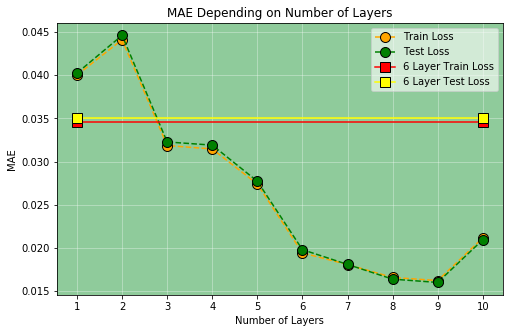

In [59]:
fig, ax = plt.subplots(figsize=(8, 5))
set_theme()

ax.plot(np.arange(1, 11), train_loss_history, color='orange', marker='o', 
       mec='k', alpha=1, ms=10, ls='--', visible=True)

ax.plot(np.arange(1, 11), test_loss_history, color='green', marker='o', 
       mec='k', alpha=1, ms=10, ls='--', visible=True)

ax.plot([1, 10], [train_mae_fc, train_mae_fc], color='red', marker='s', 
       mec='k', alpha=1, ms=10, ls='-', visible=True)

ax.plot([1, 10], [test_mae_fc, test_mae_fc], color='yellow', marker='s', 
       mec='k', alpha=1, ms=10, ls='-', visible=True)

plt.legend(['Train Loss', 'Test Loss', '6 Layer Train Loss', '6 Layer Test Loss'], framealpha=.6)
plt.title('MAE Depending on Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('MAE')
plt.xticks(np.arange(1, 11))
plt.show()

The greedy layer-wise neural net strongly outperforms the backprop trained neural net. 